In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
hdulist=fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')

In [4]:
hdulist.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [6]:
hdu=hdulist[0]
print(hdu)

In [8]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [9]:
List=["Telescope=GLAST","Observer=MICHELSON","Length of axis 3=30","unit of axis 3=MeV","What is axis 3=Photon energy"]

In [10]:
print(List)

['Telescope=GLAST', 'Observer=MICHELSON', 'Length of axis 3=30', 'unit of axis 3=MeV', 'What is axis 3=Photon energy']


In [13]:
img_data=hdu.data
hdu.data.shape

(30, 360, 720)

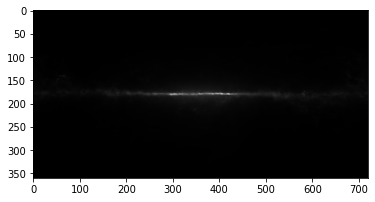

In [29]:
plt.imshow(img_data[0],cmap='gray')

In [21]:
hdu1=hdu.data[5]+hdu.data[10]+hdu.data[15]+hdu.data[20]+hdu.data[25]

In [22]:
img_data1=hdu1.data
hdu1.data.shape

(360, 720)

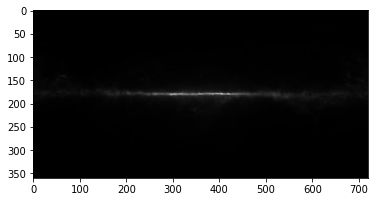

In [28]:
plt.imshow(img_data1,cmap='gray')

In [8]:
def Altaz(coords,time):
    from astropy.coordinate import SkyCoord, EarthLocation, AltAz
    from astropy.time import Time
    from astropy import units as u
    iitm=EarthLocation(lat=12.992*u.deg,lon=80.2394*u.deg,height=60*u.deg)
    timearr=[time,time+12*u.hour]
    coords_cel=coords.transform_to(AltAz(obstime=timearr,location=iitm))
    return coords_cel